In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('apart_web.csv')

In [25]:
df.head()

,Field1_links,nb_piece,nb_bains,superficie,adresse
0,https://sn.coinafrique.com/annonce/appartement...,2,2,55,"Parcelle Assainies, Dakar, Sénégal"
1,https://sn.coinafrique.com/annonce/appartement...,3,3,145,"Mamelles, Dakar, Sénégal"
2,https://sn.coinafrique.com/annonce/appartement...,147,NaN,NaN,"Ouakam, Dakar, Sénégal"
3,https://sn.coinafrique.com/annonce/appartement...,4,5,207,"Point E, Dakar, Sénégal"
4,https://sn.coinafrique.com/annonce/appartement...,4,3,135,"Yoff, Dakar, Sénégal"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Field1_links  8315 non-null   object
 1   nb_piece      7641 non-null   object
 2   nb_bains      7324 non-null   object
 3   superficie    4988 non-null   object
 4   adresse       8305 non-null   object
dtypes: object(5)
memory usage: 325.0+ KB


In [27]:
df['superficie'] = (
    df['superficie']
    .str.strip()
    .str.replace('m2', '', regex=False)
    .str.replace(' ', '', regex=False)
)
df['superficie'] = df['superficie'].astype(float)

In [28]:
import numpy as np

In [29]:
def replace_m2_with_empty(df, column):
    df[column] = df[column].apply(lambda x: np.nan if isinstance(x, str) and x.endswith('m2') else x)
    return df


df = replace_m2_with_empty(df, 'nb_piece')
df = replace_m2_with_empty(df, 'nb_bains')

In [30]:
df['nb_piece']=df['nb_piece'].astype('Int64')
df['nb_bains']=df['nb_bains'].astype('Int64')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field1_links  8315 non-null   object 
 1   nb_piece      7625 non-null   Int64  
 2   nb_bains      7311 non-null   Int64  
 3   superficie    4988 non-null   float64
 4   adresse       8305 non-null   object 
dtypes: Int64(2), float64(1), object(2)
memory usage: 341.2+ KB


In [32]:
df['nb_piece']=df['nb_piece'].fillna(df['nb_piece'].mode()[0])
df['nb_bains']=df['nb_bains'].fillna(df['nb_bains'].mode()[0])
df['superficie']=df['superficie'].fillna(df['superficie'].mode()[0])

In [33]:
df.dropna(subset=['adresse'], inplace=True)

In [34]:
df.head(10)

,Field1_links,nb_piece,nb_bains,superficie,adresse
0,https://sn.coinafrique.com/annonce/appartement...,2,2,55.0,"Parcelle Assainies, Dakar, Sénégal"
1,https://sn.coinafrique.com/annonce/appartement...,3,3,145.0,"Mamelles, Dakar, Sénégal"
2,https://sn.coinafrique.com/annonce/appartement...,147,2,150.0,"Ouakam, Dakar, Sénégal"
3,https://sn.coinafrique.com/annonce/appartement...,4,5,207.0,"Point E, Dakar, Sénégal"
4,https://sn.coinafrique.com/annonce/appartement...,4,3,135.0,"Yoff, Dakar, Sénégal"
5,https://sn.coinafrique.com/annonce/appartement...,4,3,170.0,"Yoff, Dakar, Sénégal"
6,https://sn.coinafrique.com/annonce/appartement...,2,2,12.0,"Mermoz-Sacré Coeur, Dakar, Sénégal"
7,https://sn.coinafrique.com/annonce/appartement...,1,1,150.0,"Fass, Dakar, Sénégal"
8,https://sn.coinafrique.com/annonce/appartement...,3,2,12.0,"Ngor, Dakar, Sénégal"
9,https://sn.coinafrique.com/annonce/appartement...,3,2,110.0,"Mermoz-Sacré Coeur, Dakar, Sénégal"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8305 entries, 0 to 8315
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field1_links  8305 non-null   object 
 1   nb_piece      8305 non-null   Int64  
 2   nb_bains      8305 non-null   Int64  
 3   superficie    8305 non-null   float64
 4   adresse       8305 non-null   object 
dtypes: Int64(2), float64(1), object(2)
memory usage: 405.5+ KB


In [36]:
val_num=df.select_dtypes(include=['float64','Int64']).columns

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

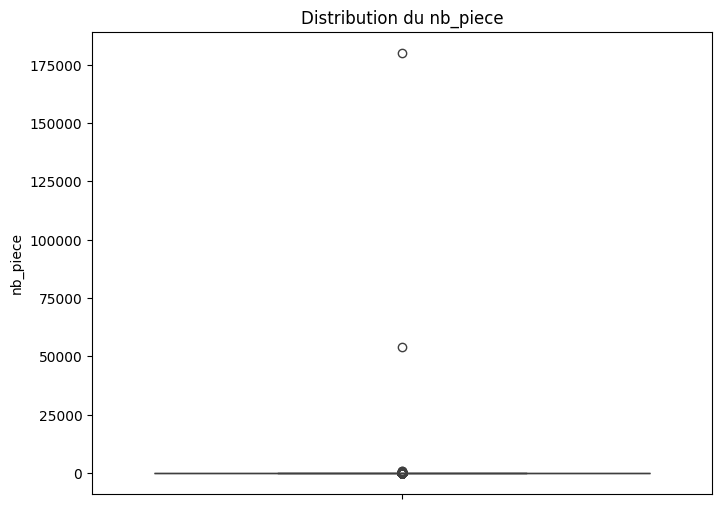

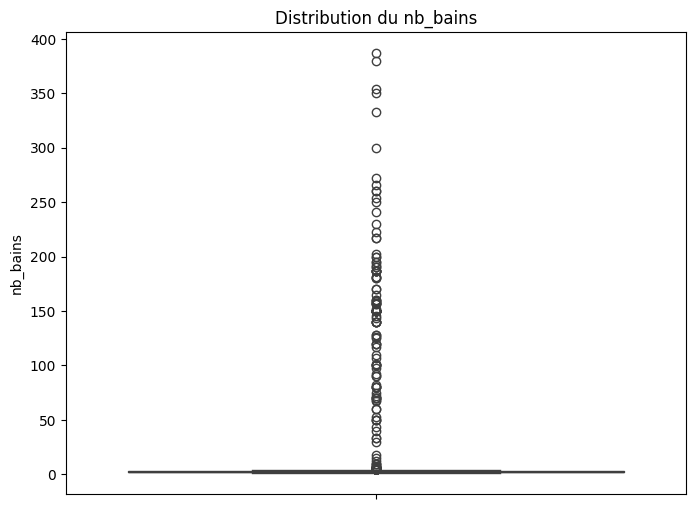

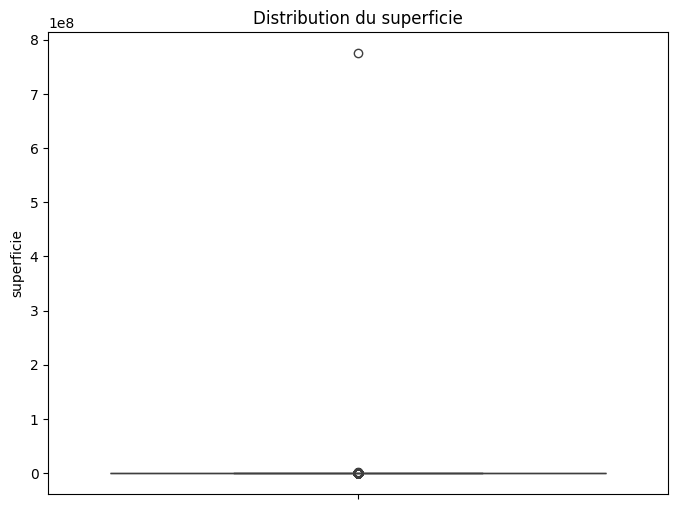

In [38]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [39]:
#gestion des valeurs abherrantes
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


for col in val_num:
    df= remove_outliers(df, col)

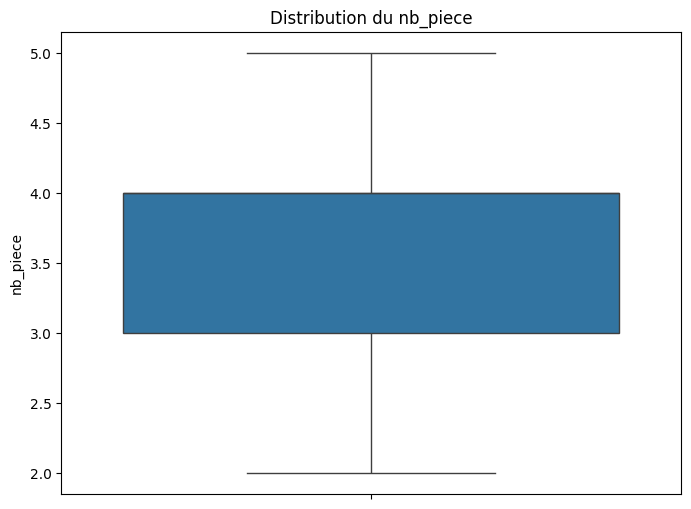

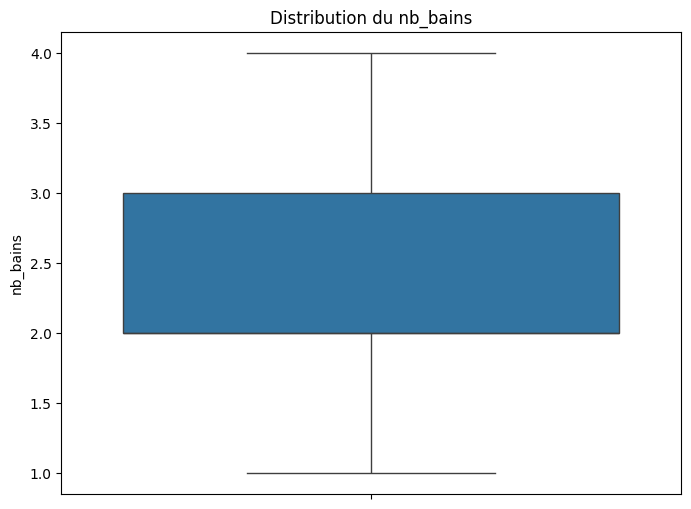

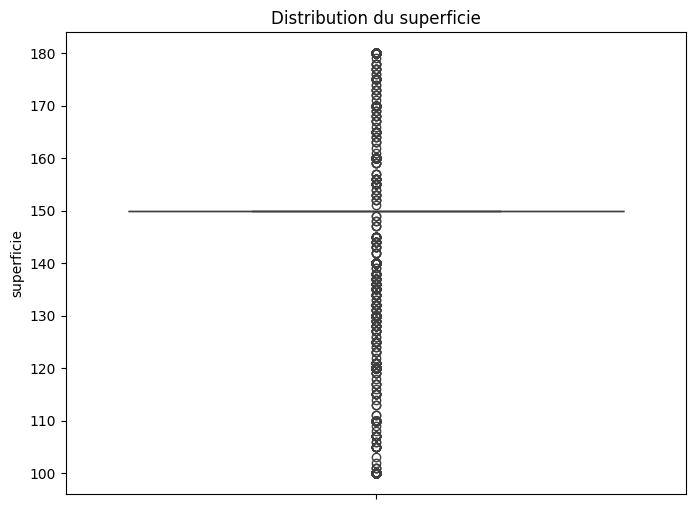

In [40]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [41]:
df.to_csv('apart_web_cleaned.csv', index=False)